# **Project 2**, APS1070 Fall 2021
**Anomaly Detection Algorithm using Gaussian Mixture Model [13 Marks]**

**Deadline: OCT 22, 9 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Ruijie Zhang
*   Student Number:1003812671 

##**Part 1: Getting started [1.5 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?  **[0.1]**

  284807
* What features in the dataset are present aside from the 28 main features?  _____ **[0.1]**

  Time,Amount,Class
* Which column contains the targets? **[0.1]**

  Class
* To what do the target values correspond?___ **[0.1]**

  1 is the Fraud and  0 is the NoFraud

In [1]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=f6173e73637b057579fb4a8ec726500f4b6b4141a5ee9b808cd37bed4772c0c7
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [4]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
### YOUR CODE HERE ###
df.head

<bound method NDFrame.head of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>


* What is the percentage of entries in the dataset for each class? class 0:   99.83%，class 1: 0.17% **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?unbalanced，as the plot shown, the percentage of entries in class 0 is much higher then class1.**[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?This will influence the accuracy of the KNN classifier and affect its result. **[0.2]**



In [7]:
### YOUR CODE HERE ###
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

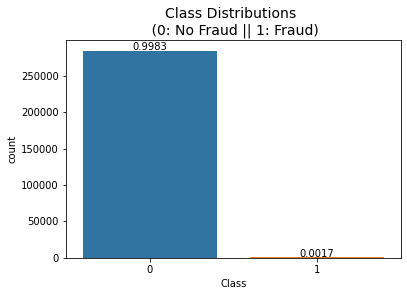

In [8]:
g = sns.countplot(df['Class'])
label = df.Class.value_counts(normalize=True).values
pches = g.patches

for i,j in zip(pches,label):
    h = i.get_height()
    g.text(i.get_x() + i.get_width()/2,h*1.005,round(j,4),ha='center')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


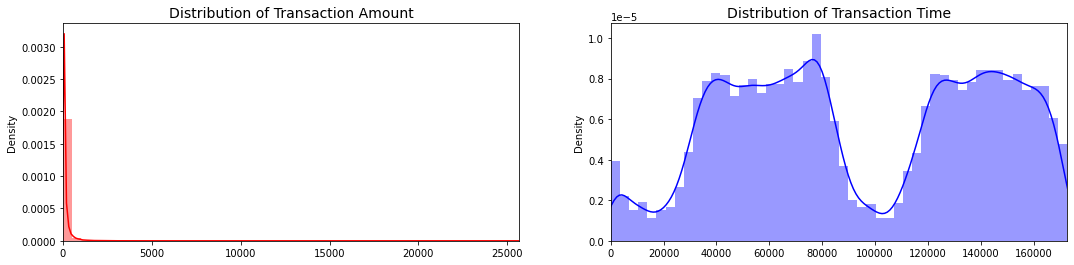

In [9]:
#prepare data
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [11]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
256516,-0.167680,0.858152,2.341913,-1.292354,-1.166306,-1.644092,-0.949666,-0.506932,-1.041918,-0.205277,-1.245186,1.573824,-1.271158,-0.855970,0.594318,-0.446904,-0.171539,-0.522074,0.382970,-0.036580,-0.004229,-0.409342,-0.196425,-0.054149,0.230360,0.458440,-0.102030,-0.177834,0.005324,-0.047994,0
191690,-0.307413,0.524900,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,-3.851722,4.513355,-4.858312,-1.765734,-10.006243,-0.439394,0.574875,0.188470,1.649224,-1.796739,0.252571,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,1
66609,0.453574,-0.382559,1.259550,-0.840719,0.729850,-0.332565,-1.490733,-0.659355,-0.699291,-0.039066,-0.193019,0.508004,-0.990066,-0.394555,-0.824790,-0.125983,-0.029634,-1.489228,0.361969,0.604114,-0.342051,-0.463873,-0.741849,-1.686440,0.229353,0.362467,-0.093460,0.727179,-0.047077,0.022406,0
276071,-0.028645,0.965601,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,0.249311,1.338318,-0.329759,-0.363591,-1.824839,-0.229679,1.842347,1.194212,0.037467,0.423099,0.037438,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,1
230476,1.017537,0.724304,-0.099724,2.795414,-6.423856,3.247513,-1.632290,-2.766665,-2.312223,0.961014,-1.896001,-4.919348,3.053654,-5.297811,-1.466030,-7.035880,1.997132,-3.836189,-2.515183,-0.864579,2.328927,0.340898,0.647714,0.126576,0.203953,0.008495,-0.174501,0.575295,0.152876,-0.098173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215953,-0.296653,0.653215,0.951025,3.252926,-5.039105,4.632411,3.014501,-1.349570,0.980940,-1.819539,-2.099049,-1.347557,2.680578,-1.462945,-0.705397,-7.445296,-0.561332,3.139656,5.665429,3.790316,-1.909799,-0.381444,1.404524,-0.760549,0.358292,-1.185942,-1.286177,0.000365,0.169662,0.108276,1
42741,6.107315,-0.510638,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,-13.215172,6.895181,-13.279700,0.755264,-13.417012,-0.210774,-10.922655,-21.906493,-8.829820,1.852467,-0.645394,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,1
64871,0.256550,-0.391828,1.080393,-0.053963,0.862048,1.246686,-0.574907,0.035056,-0.340893,0.093331,0.561223,-0.179063,-0.429032,0.545044,0.241333,-0.129713,0.688979,-0.246921,-0.054807,-0.398484,-0.723432,-0.087023,0.169278,0.637976,-0.135940,0.118647,0.560363,-0.199016,0.064265,0.032241,0
219892,-0.296793,0.672388,0.120301,1.974141,-0.434087,5.390793,1.289684,0.280590,0.221963,0.067827,-1.387054,-0.045125,0.195839,-0.629086,0.681222,-4.715521,-0.287876,0.497434,3.871618,1.492394,0.506040,0.205691,-0.038690,0.204554,-0.167313,0.791547,-0.223675,0.473223,-0.160202,0.065039,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


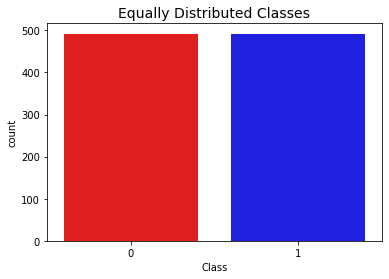

In [14]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot('Class', data=new_df, palette=['r','b'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [15]:
### Split the data  ###
import random
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
X_train, X_test, y_train, y_test = train_test_split(
    new_df[new_df.columns[2:30]], # features
    new_df[new_df.columns[30]], # targets
    test_size = 0.3,
    random_state = 0
)
X_train
# X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
# random.shuffle(df)
# splitfolders.fixed(df, df, seed=1337, fixed=(100, 100), oversample=False, group_prefix=None)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
181966,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,-3.158127,1.341572,-3.299472,1.247647,-6.393373,-0.053205,-3.258046,-3.348896,0.217331,-0.917408,-0.102294,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987
37259,1.254972,0.515290,-0.640543,1.075937,0.521988,-0.274187,0.123983,0.012749,0.144908,-0.575165,-0.682769,-0.852922,-1.043569,-0.847718,1.497315,0.509992,0.711441,0.430835,-0.617159,-0.183173,-0.092666,-0.212283,-0.179816,-0.906771,0.692067,-0.241972,0.039825,0.036879
72199,1.131577,-0.158483,1.146333,1.157782,-0.842782,0.294385,-0.731480,0.311432,0.793191,-0.005857,0.454216,0.574288,-0.907375,-0.000919,-0.397268,0.414643,-0.567816,0.654046,0.209827,-0.169444,-0.042796,0.002438,-0.047463,-0.016850,0.398223,-0.403012,0.062120,0.022922
18773,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,-4.592390,5.479392,-5.657858,-2.648076,-10.384890,-0.225946,-0.701883,0.409736,0.939604,-1.954300,0.310525,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400
150692,-11.320633,7.191950,-13.179083,9.099552,-10.094749,-2.440115,-14.184337,4.452503,-6.241960,-12.618163,6.057319,-15.717607,0.117817,-8.653743,-2.502554,-11.231364,-21.585152,-9.090892,1.171189,-0.180935,1.082235,-0.350563,0.483044,0.661133,-0.396522,-0.413315,-0.997548,-0.235036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70654,-0.648189,0.806433,0.803820,0.198962,-0.619031,-0.149073,-0.174319,0.269644,-0.117807,0.624889,1.758655,0.817807,0.101235,0.384449,1.359530,-0.472088,0.319473,-0.076625,1.539862,0.122959,0.138382,0.545256,0.238494,0.292633,-1.817741,0.868406,-0.186355,-0.022449
11880,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,-13.088891,9.815703,-14.056061,0.777192,-13.761018,-0.353636,-7.957447,-11.962954,-4.780508,0.652498,0.992279,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945
61834,-0.982345,1.383773,1.516693,-0.043680,-0.216304,-1.068204,0.821857,-0.193705,-0.195697,0.272764,0.146387,0.632767,1.087253,-0.262512,0.753734,-0.019301,-0.392405,-0.635136,-0.140958,0.296898,-0.270598,-0.432330,-0.023677,0.720554,-0.194685,-0.015971,-0.199570,-0.330899
166643,1.987137,-1.195732,-0.148030,-0.403583,-1.299004,0.023413,-1.234251,0.076635,0.273413,0.752425,-1.197663,0.053569,0.678779,-0.496273,0.638005,-0.799034,-0.440833,1.397220,-1.015478,-0.416149,-0.325155,-0.483900,0.376503,0.649173,-0.695359,0.428982,-0.003864,-0.016560


In [16]:
df_test=X_test
df_test['Class']=y_test
X_test,X_val,y_test,y_val = train_test_split(
    df_test[df_test.columns[0:28]], # features
    df_test[df_test.columns[28]], # targets
    test_size = 0.5,
    random_state = 0
)
X_val.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
29486,1.256537,-0.176816,0.457866,-0.241891,-0.677331,-0.537952,-0.391840,0.067107,0.331696,-0.011125,0.983040,0.192511,-1.046295,0.536155,0.701809,0.752493,-0.668085,0.325128,0.448331,-0.110778,-0.115160,-0.416864,0.055271,0.034587,0.091229,0.910772,-0.083103,-0.005965
6386,-2.073411,-0.363452,2.227696,0.689432,-0.186702,-0.155875,-0.524638,0.783487,1.531872,-1.554240,-0.247771,-3.267203,-0.326348,1.844793,-0.213401,0.307847,0.686235,0.479720,-1.515508,0.076023,0.220138,0.232848,-0.062539,-0.038796,0.409944,-0.355953,-0.078900,-0.151653
105225,1.176492,0.113565,-0.041630,1.177217,0.351386,0.417427,0.116477,0.017140,0.291643,-0.150104,-1.363735,0.425585,0.477456,-0.072585,-0.063284,-0.445475,-0.125885,-0.695772,-0.000964,-0.067558,-0.144443,-0.223109,-0.218679,-0.900221,0.800717,-0.255090,0.035529,0.012110
83297,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,-3.426052,0.144563,-4.283529,-0.240895,-3.657490,0.923105,0.844221,-3.948312,-1.807516,0.105879,-1.233987,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900
52584,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,-1.562206,-2.755797,3.438248,-3.521529,-0.918761,-4.452100,0.499314,-2.907903,-5.248646,-0.936815,1.160120,0.175019,1.307871,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

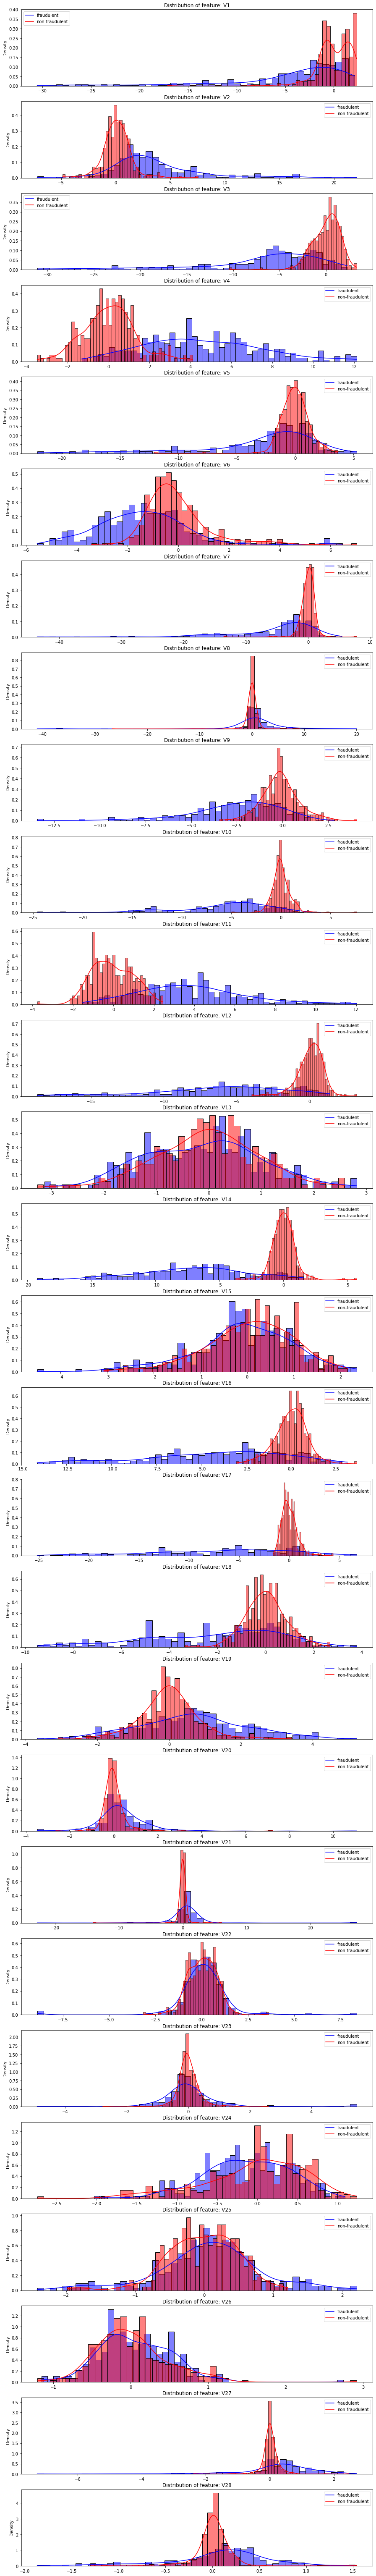

In [17]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. The distribution of feature of fraudulent and non-fraudulent of different feats are different. **[0.5]**

In [18]:
#drop unrelelated feature
X_train = X_train.drop(['V8','V20','V21','V22','V23','V25','V26','V27','V28'], axis=1)
X_test = X_test.drop(['V8','V20','V21','V22','V23','V25','V26','V27','V28'], axis=1)
X_val = X_val.drop(['V8','V20','V21','V22','V23','V25','V26','V27','V28'], axis=1)
print(X_train.shape,X_test.shape,X_val.shape)

(688, 19) (148, 19) (148, 19)


## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. 
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-fraudulent transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why? These results are different. Because the data is unbalanced and the predict value is same as the true value. **[0.5]**





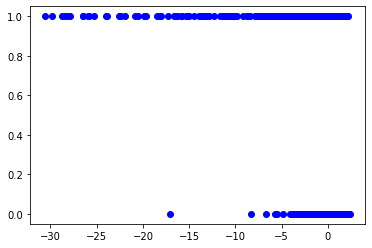

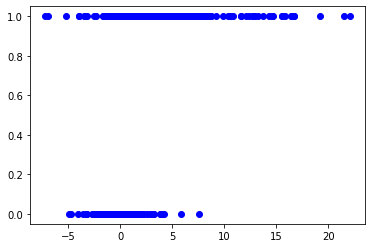

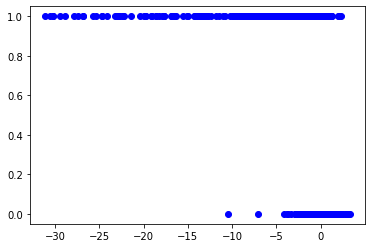

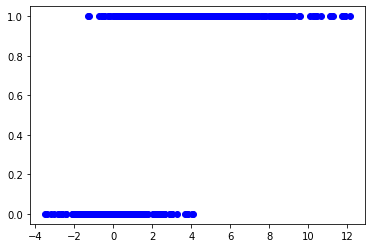

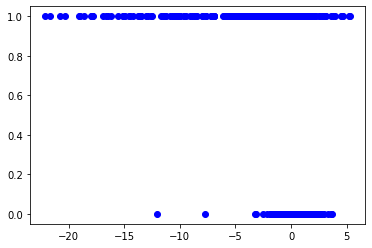

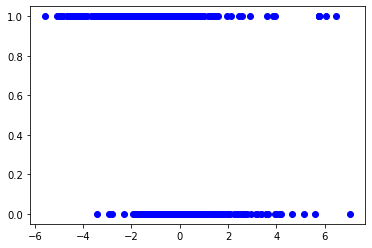

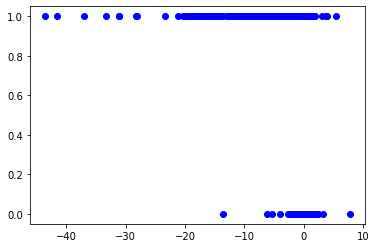

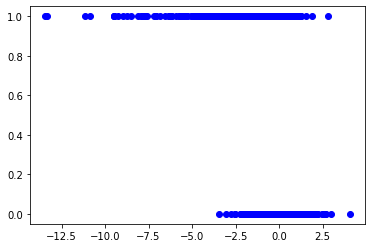

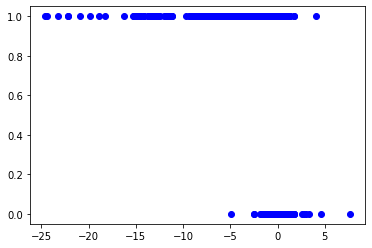

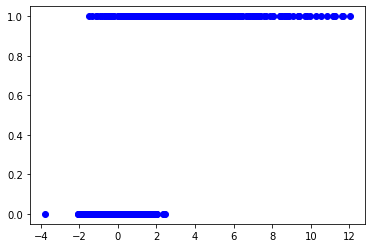

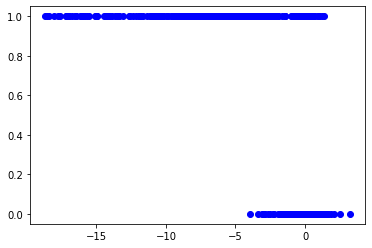

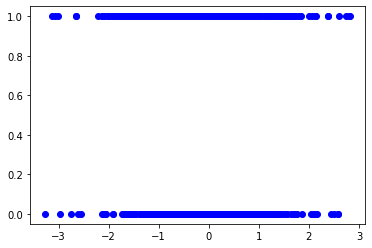

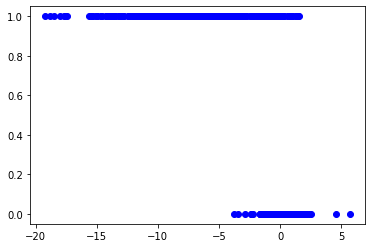

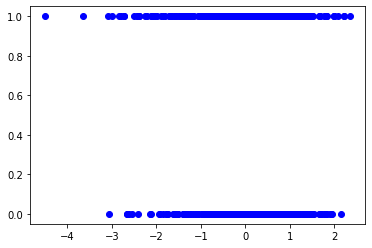

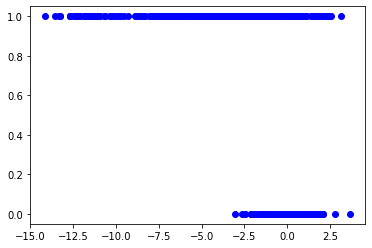

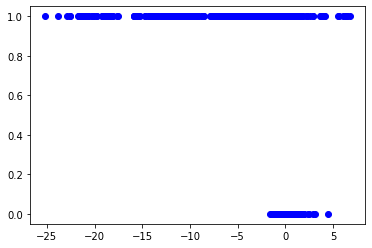

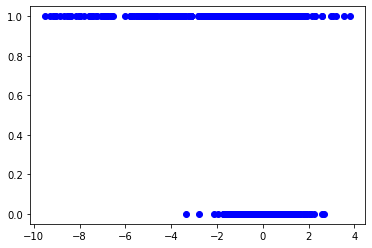

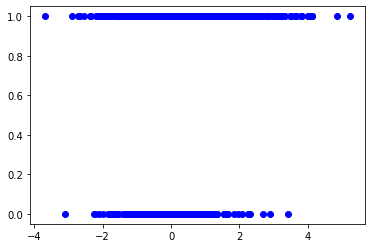

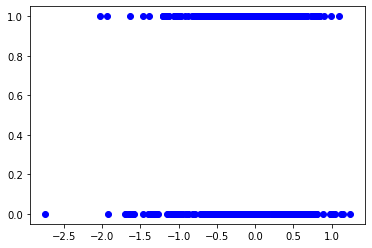

In [19]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=1)
drop_features=['V8','V20','V21','V22','V23','V25','V26','V27','V28']
for i in range(0,28):
    if 'V'+str(i+1) not in drop_features:
        tag = 'V'+str(i+1)
        new_X_train=pd.DataFrame(X_train[tag])
        new_X_train['Class']=y_train
        gmm.fit(new_X_train)
        labels = gmm.predict(new_X_train)
        frame = pd.DataFrame(new_X_train)
        frame['cluster'] = labels
        color=['blue']
        for k in range(0,1):
            data = frame[frame["cluster"]==k]
            plt.scatter(data[tag],y_train,c=color[k])
    plt.show()

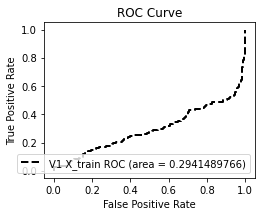

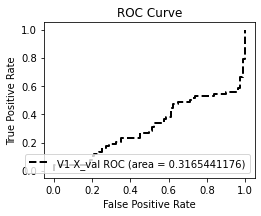

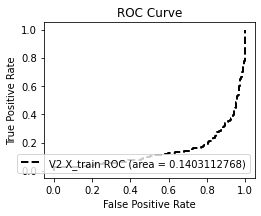

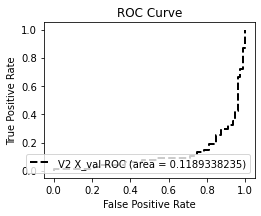

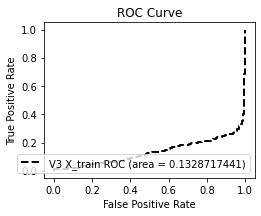

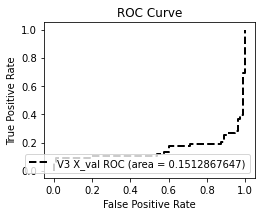

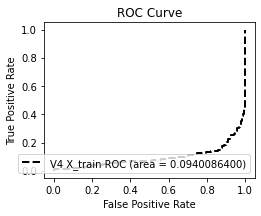

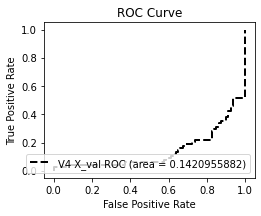

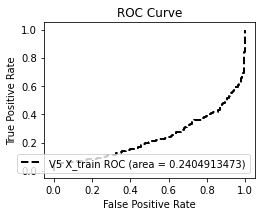

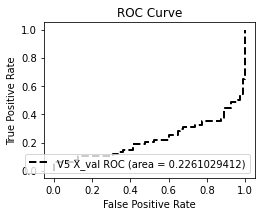

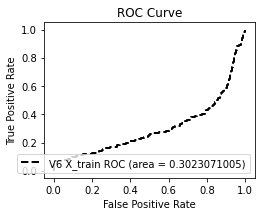

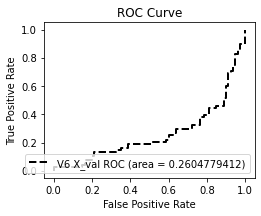

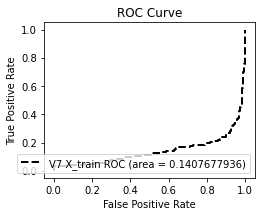

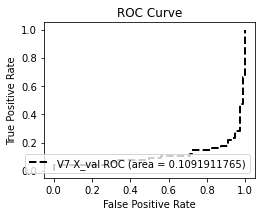

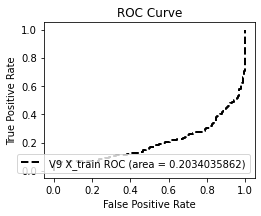

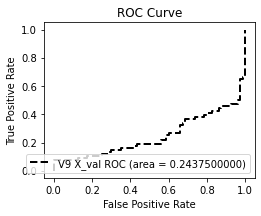

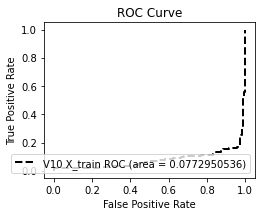

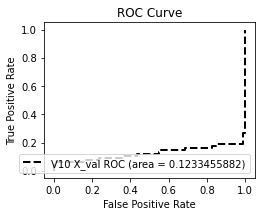

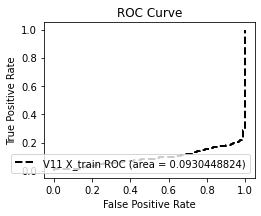

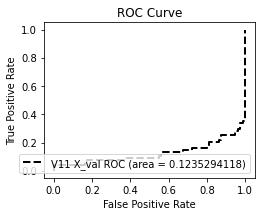

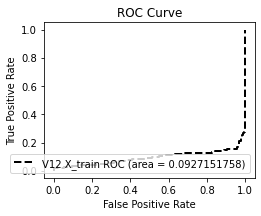

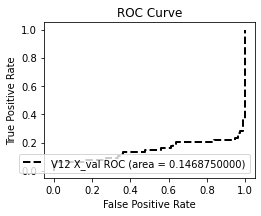

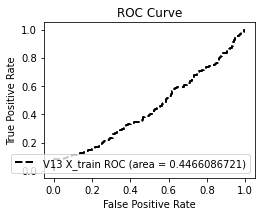

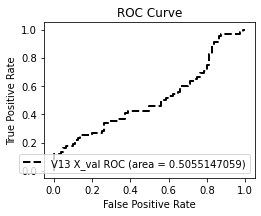

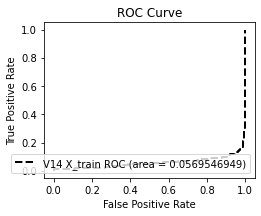

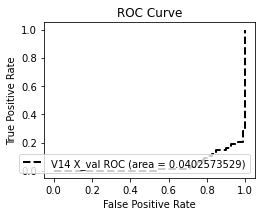

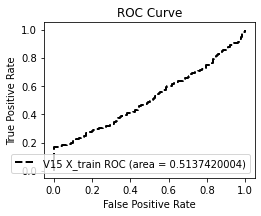

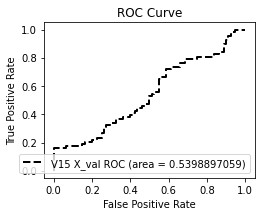

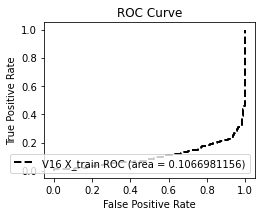

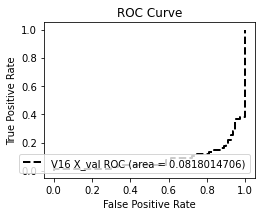

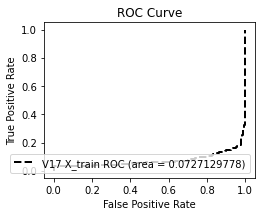

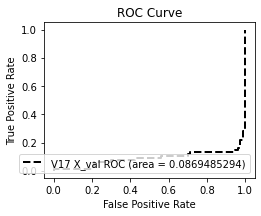

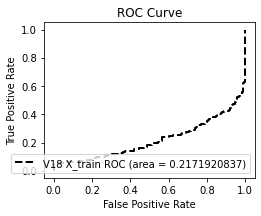

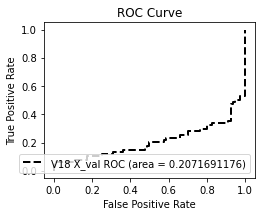

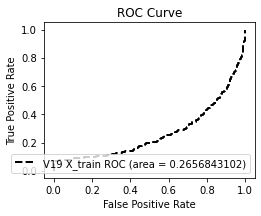

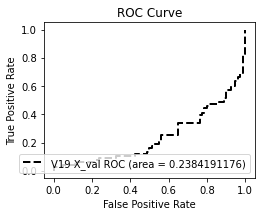

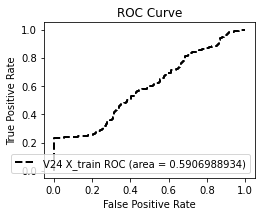

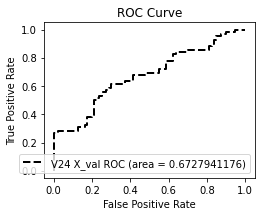

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
roc_list=[]
thersholds_list=[]
f1_score_list=[]
for i in range(0,28):
    if 'V'+str(i+1) not in drop_features:
        tag = 'V'+str(i+1)
        new_X_train=pd.DataFrame(X_train[tag])
        new_X_train['Class']=y_train
        train_scores=gmm.score_samples(new_X_train)

        new_X_val=pd.DataFrame(X_val[tag])
        new_X_val['Class']=y_val
        
        #val gauss
        val_gm=GaussianMixture(n_components=1).fit(new_X_val)
        val_pred=gmm.predict(new_X_val)
        valid_scores=gmm.score_samples(new_X_val)
        feature_f1_scores =f1_score(y_val,val_pred,average='macro')
        
        f1_score_list.append(feature_f1_scores)
        fpr, tpr, train_thersholds = roc_curve(y_train, train_scores, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(40,20))
        plt.subplot(6,9,i+1)
        plt.plot(fpr, tpr, 'k--', label=tag+' X_train ROC (area = {0:.10f})'.format(roc_auc), lw=2)
        plt.xlim([-0.05, 1.05]) 
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
        fpr, tpr, val_thersholds = roc_curve(y_val, valid_scores, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(40,20))
        plt.subplot(6,9,i+2)
        plt.plot(fpr, tpr, 'k--', label=tag+' X_val ROC (area = {0:.10f})'.format(roc_auc), lw=2)
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
        roc_list.append(roc_auc)
        thersholds_list.append(val_thersholds)
#     f1_score_list.append(f1_score(y_val,new_X_val[tag].values,average='macro'))
# print(roc_list,thersholds_list)

In [21]:
#find best 3
def FindList3MaxNum(foo):
    max1, max2, max3 = None, None, None
    for num in foo:
        if max1 is None or max1 < num:
            max1, num = num, max1
        if num is None:
            continue
        if max2 is None or num > max2:
            max2, num = num, max2
        if num is None:
            continue
        if max3 is None or num > max3:
            max3 = num
    return max1, max2, max3
max1, max2, max3=FindList3MaxNum(roc_list)
b1_thresholds=thersholds_list[roc_list.index(max1)]
b2_thresholds=thersholds_list[roc_list.index(max2)]
b3_thresholds=thersholds_list[roc_list.index(max3)]
b1_f1_score=f1_score_list[roc_list.index(max1)]
b2_f1_score=f1_score_list[roc_list.index(max2)]
b3_f1_score=f1_score_list[roc_list.index(max3)]
print("Best 1 feature: V"+str(roc_list.index(max1))+" "+str(max1))
print("Best 2 feature: V"+str(roc_list.index(max2))+" "+str(max2))
print("Best 3 feature: V"+str(roc_list.index(max3))+" "+str(max3))

Best 1 feature: V18 0.6727941176470589
Best 2 feature: V13 0.539889705882353
Best 3 feature: V11 0.5055147058823529


In [22]:
# feature_V18_f1_scores =f1_score(y_val,new_X_val['V18'].values,average='macro')
print('Best 1 feature threshold: ', b1_thresholds[np.argmax(b1_f1_score)])
print('Best 1 feature F1-Score: ', np.max(b1_f1_score))
# feature_V14_f1_scores = 2*recall*precision/(recall+precision)
print('Best 2 feature threshold: ', b2_thresholds[np.argmax(b2_f1_score)])
print('Best 2 feature F1-Score: ', np.max(b2_f1_score))
# feature_V12_f1_scores = 2*recall*precision/(recall+precision)
print('Best 3 feature threshold: ', b3_thresholds[np.argmax(b3_f1_score)])
print('Best 3 feature F1-Score: ', np.max(b3_f1_score))

Best 1 feature threshold:  -0.07973187388822267
Best 1 feature F1-Score:  0.3508771929824562
Best 2 feature threshold:  -0.07944581841445486
Best 2 feature F1-Score:  0.3508771929824562
Best 3 feature threshold:  -0.08141105444672125
Best 3 feature F1-Score:  0.3508771929824562


Report the complexity of your method (Big O notation) for determining the optimal threshold.
O(n)

In [23]:
#Compute AUC and F1 score when you fit a Gaussian only on non-fraudulent transactions (instead of all the transactions).
fraud_data=new_df[new_df['Class']==1]
no_fraud_data=new_df[new_df['Class']==0]
fraud_y_true=pd.DataFrame(fraud_data['Class'])
new_fraud_data=fraud_data.drop(['scaled_time', 'scaled_amount','V8','V20','V21','V22','V23','V25','V26','V27','V28'], axis=1)
new_no_fraud_data=no_fraud_data.drop(['scaled_time', 'scaled_amount','V8','V20','V21','V22','V23','V25','V26','V27','V28'], axis=1)

In [24]:
new_no_fraud_data

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V24,Class
256516,2.341913,-1.292354,-1.166306,-1.644092,-0.949666,-0.506932,-1.041918,-1.245186,1.573824,-1.271158,-0.855970,0.594318,-0.446904,-0.171539,-0.522074,0.382970,-0.036580,-0.004229,0.458440,0
66609,1.259550,-0.840719,0.729850,-0.332565,-1.490733,-0.659355,-0.699291,-0.193019,0.508004,-0.990066,-0.394555,-0.824790,-0.125983,-0.029634,-1.489228,0.361969,0.604114,-0.342051,0.362467,0
206043,-1.032213,1.020673,2.397073,0.910570,-1.004047,0.375941,-0.660391,0.340713,-0.529371,-1.507208,-0.871112,-1.321301,0.158570,1.408675,0.408544,-0.161323,1.067155,0.212478,-0.129663,0
138689,1.171331,-0.250878,0.249376,0.495803,-0.154959,0.609837,-0.426391,0.618263,-0.032654,0.155860,-0.049636,-1.904470,0.442829,-0.309430,0.066402,-0.183478,-0.152544,0.491876,-0.881624,0
181078,-1.821047,0.935752,1.742387,-0.006603,-0.440785,-0.077168,-0.254336,0.850277,-0.686301,-1.142453,1.084144,1.007084,-0.567065,-0.260198,-0.796672,0.326355,-0.246904,1.060616,0.000794,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143556,1.230420,-0.858806,0.534184,-0.391908,-1.401333,-0.608783,-0.653266,-0.512791,0.729032,0.761179,0.003371,-1.574580,0.300132,-0.829805,-1.525686,0.292147,1.128806,-0.129219,0.514647,0
151720,0.141591,1.084148,-0.319930,-0.352796,1.002843,-0.752169,0.834841,1.329042,-1.188000,0.064150,-2.952503,1.116707,0.521197,-0.907552,0.360193,1.090005,0.161995,-0.386859,0.396590,0
63786,-1.257680,0.698229,1.277587,2.346246,1.188736,0.317147,0.323482,-1.539860,1.072663,1.136650,0.598740,0.740290,0.254052,0.309521,0.072922,-0.402425,0.037183,0.222345,-0.258869,0
71452,1.030556,-0.539856,0.505794,0.135031,-0.793349,-0.203007,-0.328288,0.435986,-0.110642,0.837096,0.760355,-0.239808,0.111891,-0.162336,0.449710,-0.486248,0.212784,0.502600,0.091085,0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


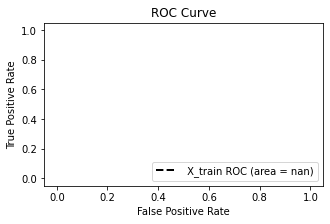

fraud_f1_score: 0.3708609271523179


In [25]:
#fraud_AUC
fraud_gm = GaussianMixture(n_components=2).fit(new_fraud_data)
fraud_labels = fraud_gm.predict(new_fraud_data)
fraud_gm_scores=fraud_gm.score_samples(new_fraud_data)
fpr, tpr, thersholds = roc_curve(fraud_y_true,fraud_gm_scores, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, 'k--', label=' X_train ROC (area = {0:.10f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
#fraud_f1_score
fraud_f1_score=f1_score(fraud_y_true, fraud_labels,average='binary')
print("fraud_f1_score:",fraud_f1_score)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


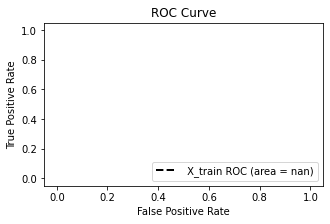

no_fraud_f1_score: 0.0


In [26]:
#no_fraud_AUC
no_fraud_gm = GaussianMixture(n_components=2).fit(new_no_fraud_data)
no_fraud_labels = no_fraud_gm.predict(new_no_fraud_data)
no_fraud_gm_scores=no_fraud_gm.score_samples(new_no_fraud_data)
fpr, tpr, thersholds = roc_curve(no_fraud_data[new_no_fraud_data.columns[-1]], no_fraud_labels)
# print(fraud_data[fraud_data.columns[-1]])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, 'k--', label=' X_train ROC (area = {0:.10f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
#no_fraud_f1_score
no_fraud_f1_score=f1_score(new_no_fraud_data[new_no_fraud_data.columns[-1]], no_fraud_labels,average='binary')
print("no_fraud_f1_score:",no_fraud_f1_score)

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). 
 3. Color the data points based on their class (non-fraudulent blue and fraudulent red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain. n_components=4 is the best choose. Because the data point overlap too much when n_components>4. **[0.25]**
 5. Fit your Gaussian model on all the data points. 
 6. Compute AUC on both training and validation sets 
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





In [27]:
import pandas as pd
### YOUR CODE HERE ###
two_features_gm = GaussianMixture(n_components=2, random_state=0).fit(X_train)
labels=two_features_gm.predict(X_train)
f1=X_train.values[0:,1]
f2=X_train.values[0:,2]

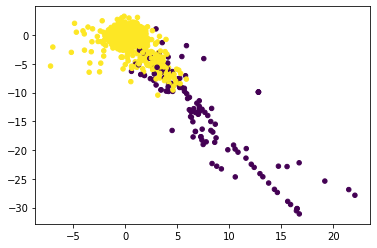

In [28]:
plt.scatter(f1,f2,s=20,c=labels)
plt.show()

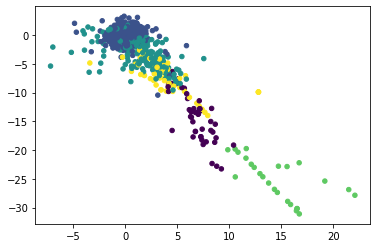

In [29]:
test_features_gm = GaussianMixture(n_components=5, random_state=0).fit(X_train)
test_features_labels=test_features_gm.predict(X_train)
plt.scatter(f1,f2,s=20,c=test_features_labels)
plt.show()

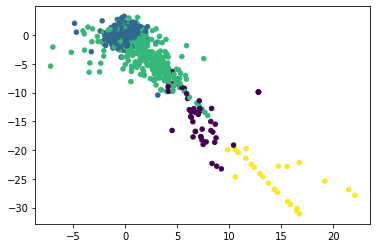

In [30]:
n_features_gm = GaussianMixture(n_components=4, random_state=0).fit(X_train)
n_features_labels=n_features_gm.predict(X_train)
plt.scatter(f1,f2,s=20,c=n_features_labels)
plt.show()

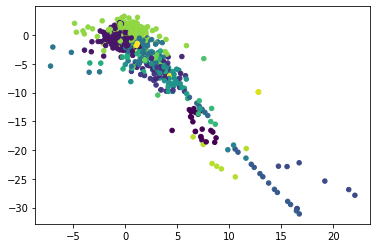

In [31]:
#Fit your Gaussian model on all the data points.
full_features_gm = GaussianMixture(n_components=19, random_state=0).fit(X_train)
full_features_labels=full_features_gm.predict(X_train)
plt.scatter(f1,f2,s=20,c=full_features_labels)
plt.show()

In [32]:
#val_set
full_val_features_gm = GaussianMixture(n_components=19, random_state=0).fit(X_val)
full_val_features_labels=full_val_features_gm.predict(X_val)

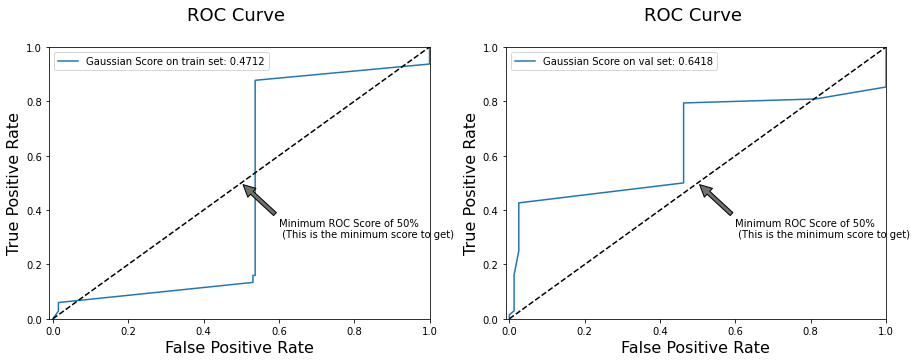

In [33]:
#Compute AUC on both training and validation sets
from sklearn.metrics import roc_auc_score
train_fpr, train_tpr, train_threshold = roc_curve(y_train, full_features_labels)
val_fpr, val_tpr, val_threshold = roc_curve(y_val, full_val_features_labels)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('ROC Curve \n ', fontsize=18)
plt.plot(train_fpr, train_tpr, label='Gaussian Score on train set: {:.4f}'.format(roc_auc_score(y_train, full_features_labels)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
plt.legend()

plt.subplot(1,2,2)
plt.title('ROC Curve \n ', fontsize=18)
plt.plot(val_fpr, val_tpr, label='Gaussian Score on val set: {:.4f}'.format(roc_auc_score(y_val, full_val_features_labels)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
plt.legend()
plt.show()

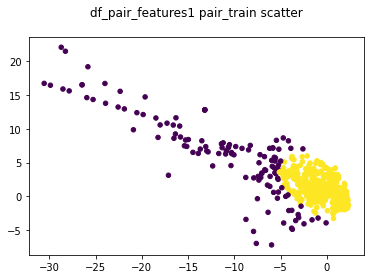

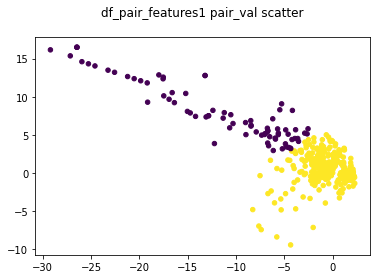

F1 score:  0.4922600619195046


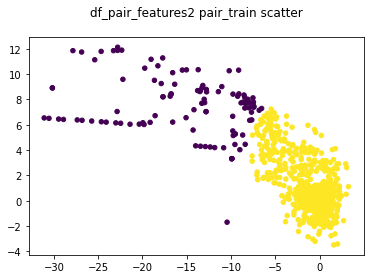

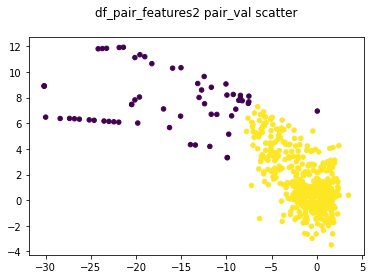

F1 score:  0.5203007518796994


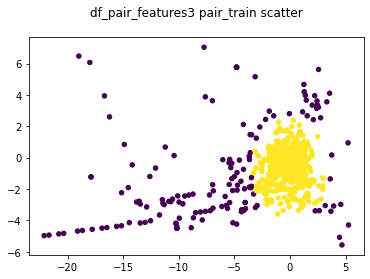

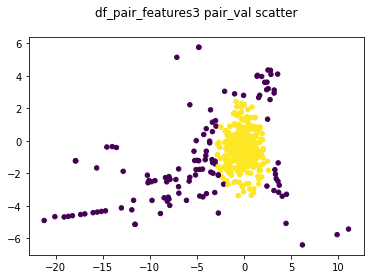

F1 score:  0.4477611940298508


In [34]:
from sklearn.metrics import f1_score

#Pick 3 new pairs of features and repeat steps 2 to 6. [0.25]
pair_features_1=['V1','V2']
pair_features_2=['V3','V4']
pair_features_3=['V5','V6']
df_pair_list=[]
df_pair_features_1=pd.DataFrame(new_df['V1'])
df_pair_features_1['V2']=new_df['V2']
df_pair_features_1['Class']=new_df['Class']
df_pair_list.append(df_pair_features_1)
df_pair_features_2=pd.DataFrame(new_df['V3'])
df_pair_features_2['V4']=new_df['V4']
df_pair_features_2['Class']=new_df['Class']
df_pair_list.append(df_pair_features_2)
df_pair_features_3=pd.DataFrame(new_df['V5'])
df_pair_features_3['V6']=new_df['V6']
df_pair_features_3['Class']=new_df['Class']
df_pair_list.append(df_pair_features_3)
def get_pair_train_test_val(df_pair):
    pair_X_train, pair_X_test, pair_y_train, pair_y_test = train_test_split(
    df_pair[df_pair.columns[0:2]], # features
    df_pair[df_pair.columns[2]], # targets
    test_size = 0.3,
    random_state = 0
    )
    df_test=pair_X_test
    df_test['Class']=pair_y_test
    pair_X_test,pair_X_val,pair_y_test,pair_y_val = train_test_split(
    df_pair[df_pair.columns[0:2]], # features
    df_pair[df_pair.columns[2]], # targets
    test_size = 0.5,
    random_state = 0
    )
    return pair_X_train, pair_X_test, pair_y_train, pair_y_test,pair_X_val,pair_y_val
count=0
for pair in df_pair_list:
    count+=1
    pair_X_train, pair_X_test, pair_y_train, pair_y_test,pair_X_val,pair_y_val=get_pair_train_test_val(pair)
    #Fit your Gaussian model on train and val
    pair_gm = GaussianMixture(n_components=2, random_state=0).fit(pair_X_train)
    pair_labels=pair_gm.predict(pair_X_train)
    pair_f1=pair_X_train.values[0:,0]
    pair_f2=pair_X_train.values[0:,1]
    plt.title('df_pair_features'+str(count)+' pair_train scatter\n ')
    plt.scatter(pair_f1,pair_f2,s=20,c=pair_labels)
    plt.show()
    
    val_pair_gm = GaussianMixture(n_components=2, random_state=0).fit(pair_X_val)
    val_pair_labels=val_pair_gm.predict(pair_X_val)
    val_pair_f1=pair_X_val.values[0:,0]
    val_pair_f2=pair_X_val.values[0:,1]
    plt.title('df_pair_features'+str(count)+' pair_val scatter\n ')
    plt.scatter(val_pair_f1,val_pair_f2,s=20,c=val_pair_labels)
    plt.show()
    #For each pair, find a threshold to maximize your validation set F1 Score.[0.25]
    
    pair_f1_score=np.max(f1_score(pair_y_val.values, val_pair_labels, average="binary"))
    print("F1 score: ",pair_f1_score)
    #For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold 
    #(use the code of the similar figure in the tutorial) [0.25]
    # Circling of anomalies
#     pair_best_threshold=val_threshold[np.argmax(f1_score(pair_y_val.values, val_pair_labels, average="binary"))]
#     print('Best threshold: ',pair_best_threshold )
    outliers = np.nonzero(val_pair_labels<0.01)[0]
#     print(pair_X_val)
#     print(outliers)
#     print(pair_X_val.loc[outliers[0]:0])
#     plt.scatter(pair_X_val[outliers,0],pair_X_val[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [35]:
#Fit a Gaussian distribution ( 𝐺1 ) on a feature of non-fraudulent transactions using sklearn.mixture.GaussianMixture when n_components=1. [0.25]
new_no_fraud=pd.DataFrame(no_fraud_data['V1'])
G1=GaussianMixture(n_components=1, random_state=0).fit(new_no_fraud)
non_fraud_labels=G1.predict(new_no_fraud)

In [36]:
#Fit another Gaussian distribution ( 𝐺2 ) on the same feature but for fraudulent transactions using sklearn.
#mixture.GaussianMixture when n_components=1. [0.25]
new_fraud=pd.DataFrame(fraud_data['V1'])
G2=GaussianMixture(n_components=1, random_state=0).fit(new_fraud)
fraud_labels=G1.predict(new_fraud)

In [37]:
#Compute the score samples ( 𝑆 ) for both  𝐺1  and  𝐺2  on the validation set to get  𝑆1  and  𝑆2 , respectively. [0.25]
s1=G1.score_samples(pd.DataFrame(X_val['V1']))
s2=G2.score_samples(pd.DataFrame(X_val['V1']))

In [38]:
#Find an optimal  𝑐 
# c=range(0,10,0.1)


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraudulent ones! Why does it make sense to have multiple components for fraudulent transactions?

Text(0.5, 1.0, 'Normal')

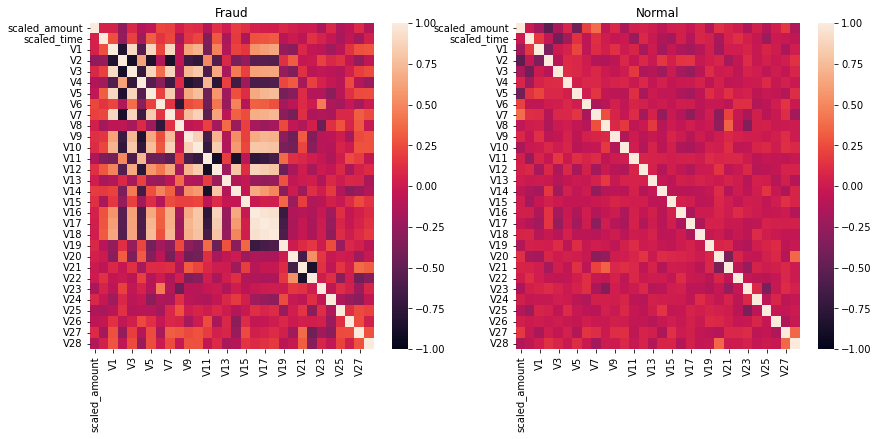

In [39]:
fraud_data_new = new_df[new_df['Class']==1]
normal_data_new = new_df[new_df['Class']==0]

f, [ax1, ax2] = plt.subplots(1,2,figsize=(14,6))
sns.heatmap(fraud_data_new.drop('Class', 1).corr(), ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Fraud')
sns.heatmap(normal_data_new.drop('Class', 1).corr(), ax=ax2, vmin=-1, vmax=1)
ax2.set_title('Normal')

In [40]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = new_df.drop('Class', 1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

ss = StandardScaler()

sm = SMOTE(random_state=1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(X_train.shape)
print(X_train_sm.shape)

(688, 30)
(688, 30)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [41]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [43]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision = %.03f'%(tp/(tp+fp)))
    print('Recall    = %.03f'%(tp/(tp+fn)))
    print('F1_score  = %.03f'%(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                    ((tp/(tp+fp))+(tp/(tp+fn))))))
    return (tp/(tp+fp)),(tp/(tp+fn)),(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                    ((tp/(tp+fp))+(tp/(tp+fn)))))

In [44]:
#roc curve
def plot_roc():
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr, tpr, label = 'AUC = %0.3f'% roc_auc, linewidth = 2)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [45]:
#precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

1、LogisticRegression


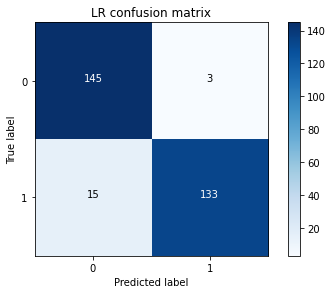

Precision = 0.978
Recall    = 0.899
F1_score  = 0.937


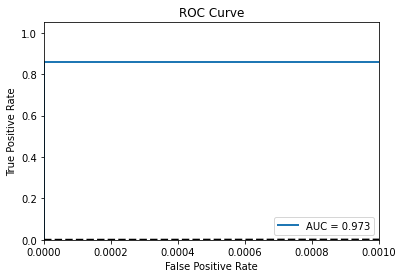

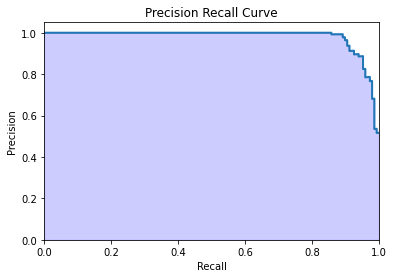

In [46]:
lr = LogisticRegression()
lr.fit(X_train_sm, y_train_sm)
y_pred = lr.predict(X_test)
y_score = lr.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='LR confusion matrix')
plt.show()

show_metrics()

fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

2、 RandomForest


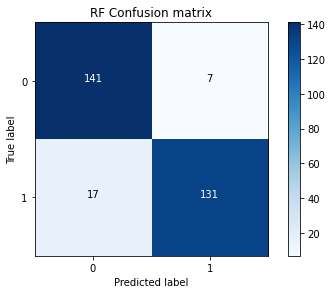

Precision = 0.949
Recall    = 0.885
F1_score  = 0.916


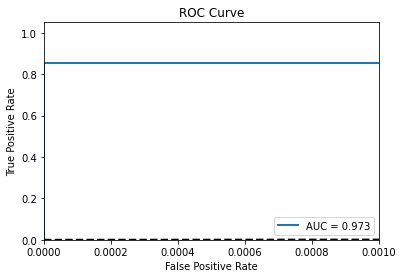

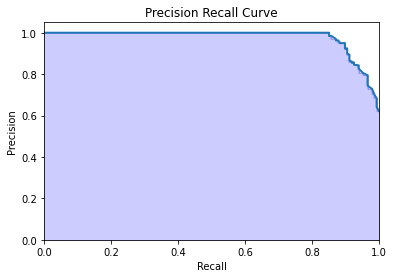

In [47]:
rf = RandomForestClassifier(n_jobs = -1,
                            random_state = 1)
rf.fit(X_train_sm, y_train_sm)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_rf, tpr_rf, t_rf = fpr, tpr, t
precision_rf, recall_rf, thresholds_rf = precision, recall, thresholds

3、 Extreme Gradient Boosting (XGB)


In [ ]:
xgb_cf = xgb.XGBClassifier(n_jobs = -1)
xgb_cf.fit(X_train_sm, y_train_sm)
y_pred = xgb_cf.predict(X_test)
y_score = xgb_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='XGB confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_xgb, tpr_xgb, t_xgb = fpr, tpr, t
precision_xgb, recall_xgb, thresholds_xgb = precision, recall, thresholds

4、LightGBM

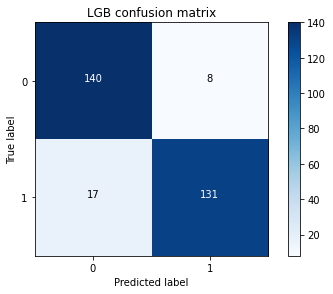

Precision = 0.942
Recall    = 0.885
F1_score  = 0.913


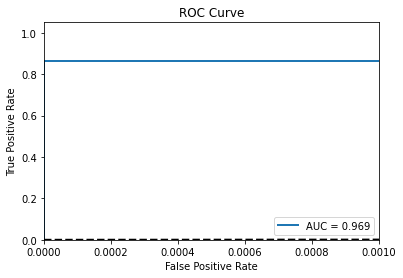

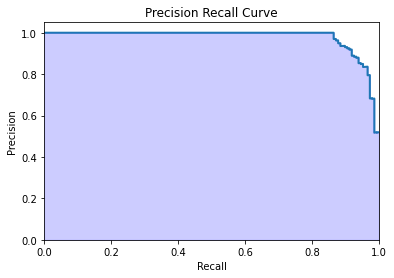

In [52]:
lgb_cf = lgb.LGBMClassifier()
lgb_cf.fit(X_train_sm, y_train_sm)
y_pred = lgb_cf.predict(X_test)
y_score = lgb_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LGB confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_lgb, tpr_lgb, t_lgb = fpr, tpr, t
precision_lgb, recall_lgb, thresholds_lgb = precision, recall, thresholds

5、Voting Classifier



In [ ]:
voting_cf = VotingClassifier (
        estimators = [('xgb', xgb_cf), ('lr', lr), ('rf', rf), ('lgb', lgb_cf)],
                     voting='soft', weights = [1.2, 1, 1.2, 1])
    
voting_cf.fit(X_train_sm, y_train_sm)

y_pred = voting_cf.predict(X_test)
y_score = voting_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'VOTING Confusion matrix')
plt.savefig('1.voting_confusion_matrix.png')
plt.show()

pre_voting,recal_voting,F1_score_voting=show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_voting, tpr_voting, t_voting = fpr, tpr, t
precision_voting, recall_voting, thresholds_voting = precision, recall, thresholds

optimal params

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

CV_lr = GridSearchCV(estimator = lr, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_lr.fit(X_train_sm, y_train_sm)

best_parameters = CV_lr.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


The best parameters for using this model is {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


6、Logistic regression with the best parameters

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


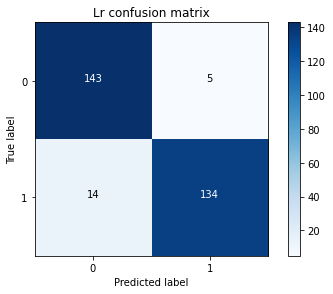

Precision = 0.964
Recall    = 0.905
F1_score  = 0.934


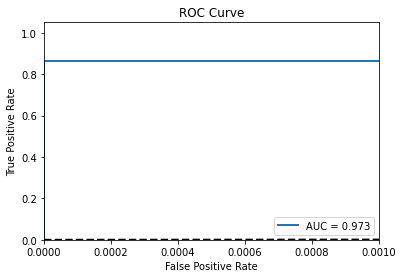

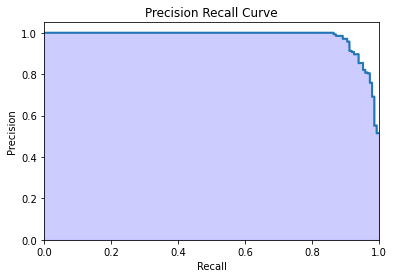

In [55]:
lrb = LogisticRegression(C = best_parameters['C'], 
                        penalty = best_parameters['penalty'], 
                        class_weight = best_parameters['class_weight'])

lrb.fit(X_train_sm, y_train_sm)
y_pred = lrb.predict(X_test)
y_score = lrb.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Lr confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_lrb, tpr_lrb, t_lrb = fpr, tpr, t
precision_lrb, recall_lrb, thresholds_lrb = precision, recall, thresholds

7、KNN

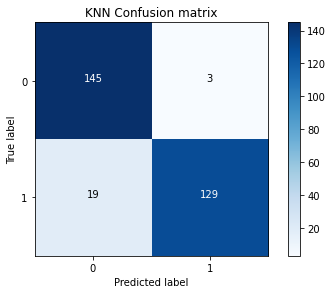

Precision = 0.977
Recall    = 0.872
F1_score  = 0.921


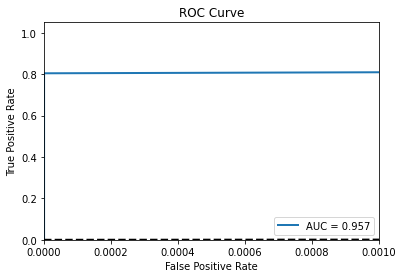

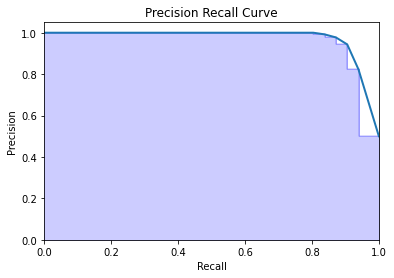

In [56]:
knn_cf = KNeighborsClassifier()
    
knn_cf.fit(X_train_sm, y_train_sm)

y_pred = knn_cf.predict(X_test)
y_score = knn_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'KNN Confusion matrix')
plt.savefig('1.knn_confusion_matrix.png')
plt.show()

pre_knn,recal_knn,F1_score_knn=show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_knn, tpr_knn, t_knn = fpr, tpr, t
precision_knn, recall_knn, thresholds_knn = precision, recall, thresholds

8、GaussianMixture

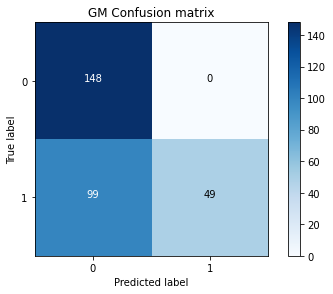

Precision = 1.000
Recall    = 0.331
F1_score  = 0.497


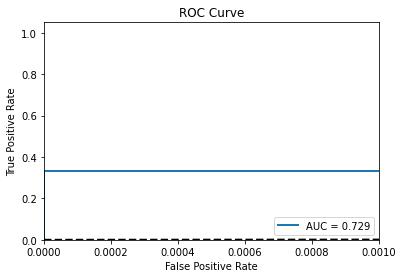

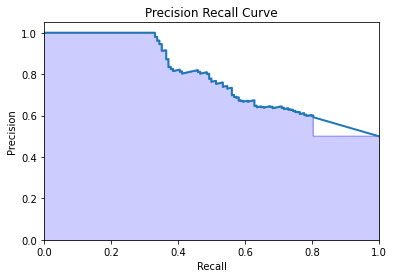

In [57]:
gmm_cf =  GaussianMixture(n_components=2, random_state=0)
    
gmm_cf.fit(X_train_sm, y_train_sm)

y_pred = gmm_cf.predict(X_test)
y_score = gmm_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'GM Confusion matrix')
plt.savefig('1.gm_confusion_matrix.png')
plt.show()

pre_gm,recal_gm,F1_score_gm=show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_gm, tpr_gm, t_gm = fpr, tpr, t
precision_gm, recall_gm, thresholds_gm = precision, recall, thresholds

9、 SVC

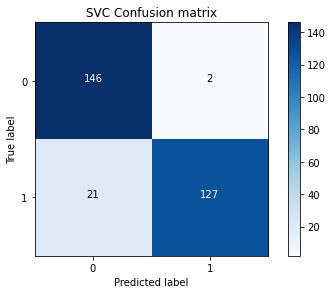

Precision = 0.984
Recall    = 0.858
F1_score  = 0.917


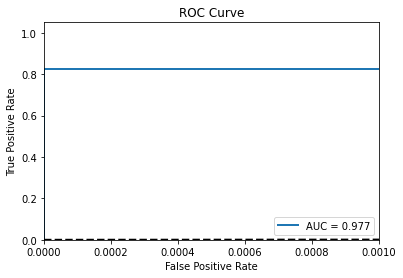

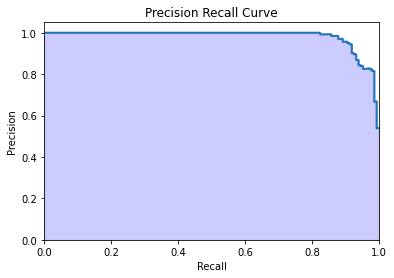

In [58]:
svc_cf = SVC(probability=True)
    
svc_cf.fit(X_train_sm, y_train_sm)

y_pred = svc_cf.predict(X_test)
y_score = svc_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'SVC Confusion matrix')
plt.savefig('1.svc_confusion_matrix.png')
plt.show()

pre_svc,recal_svc,F1_score_svc=show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_svc, tpr_svc, t_svc = fpr, tpr, t
precision_svc, recall_svc, thresholds_svc = precision, recall, thresholds

10、DecisionTreeClassifier

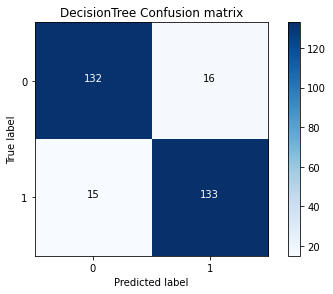

Precision = 0.893
Recall    = 0.899
F1_score  = 0.896


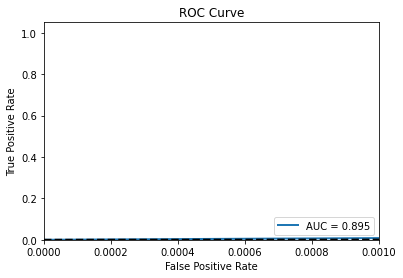

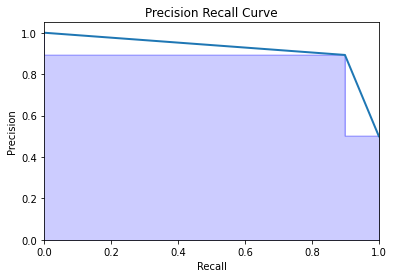

In [59]:
decisiontree_cf = DecisionTreeClassifier()
    
decisiontree_cf.fit(X_train_sm, y_train_sm)

y_pred = decisiontree_cf.predict(X_test)
y_score = decisiontree_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'DecisionTree Confusion matrix')
plt.savefig('1.decisiontree_confusion_matrix.png')
plt.show()

pre_decision,recal_decision,F1_score_decision=show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_decision, tpr_decision, t_decision = fpr, tpr, t
precision_decision, recall_decison, thresholds_decision = precision, recall, thresholds

In [ ]:
def roc_curve_all_models () : 
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_rf, tpr_rf, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_xgb, tpr_xgb, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_lr, tpr_lr, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_lgb, tpr_lgb, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_voting, tpr_voting, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_lrb, tpr_lrb, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_knn, tpr_knn, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_gm, tpr_gm, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_svc, tpr_svc, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_decision, tpr_decision, label = 'ROC curve', linewidth = 2)

    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(['1.RandomForest','2.Extreme Gradient Boosting', '3.LogisticRegression', '4.LightGBM', '5.Voting','6.LogisticRegressionWithBestParams','7.KNN','8.GaussianMixture','9.SVC','10.DecisionTree'], loc='lower right')
    plt.show()

roc_curve_all_models ()

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


So far SVC is the best model.

In [61]:
best_model=pd.DataFrame(columns=['precision','recall','F1 Score'], data=[[pre_svc,recal_svc,F1_score_svc]])
best_model

,precision,recall,F1 Score
0,0.984496,0.858108,0.916968


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references. 




SVC is used to classify a situation. In this dataset, it shows a better auc curve.
SVC is a C-Support Vector Classification.
The implementation is based on libsvm. The fit time scales is at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after the Nystroem transformer.

Reference

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC